Phishing URL Detection: Data Preprocessing

--------------------------------------------------------------------------------------------------------------------------------------------------

<small>

#### Meta Information  


**FILENAME** – File identifier (likely from dataset source).  

**URL** – The actual URL of the webpage.  

**Domain** – Extracted domain from the URL.  

**TLD** – Top-level domain (e.g., .com, .org).  

**Title** – The HTML page title.  

---

#### URL-based Features  


**URLLength** – Total length of the URL.  

**DomainLength** – Number of characters in the domain.  

**IsDomainIP** – Binary; 1 if domain is an IP address instead of text.  

**URLSimilarityIndex** – How similar the URL is to legitimate domains.  

**CharContinuationRate** – Ratio of continuous characters (suspicious repetition).  

**TLDLegitimateProb** – Probability of TLD being associated with legitimate websites.  

**URLCharProb** – Probability of URL’s character distribution being normal/legit.  

**TLDLength** – Number of characters in the TLD.  

**NoOfSubDomain** – Count of subdomains (too many may indicate phishing).  

---

#### Obfuscation-related Features  


**HasObfuscation** – Binary; presence of obfuscation techniques.  

**NoOfObfuscatedChar** – Count of obfuscated characters (e.g., %20, hex encoding).  

**ObfuscationRatio** – Ratio of obfuscated characters to total URL length.  

---

#### Character Composition Features  
  

**NoOfLettersInURL** – Count of letters in URL.  

**LetterRatioInURL** – Proportion of letters in URL.  

**NoOfDegitsInURL** – Count of digits in URL.  

**DegitRatioInURL** – Proportion of digits in URL.  

**NoOfEqualsInURL** – Count of = in URL (unusual in legit URLs).  

**NoOfQMarkInURL** – Count of ? in URL (query parameter usage).  

**NoOfAmpersandInURL** – Count of & in URL (used in query strings).  

**NoOfOtherSpecialCharsInURL** – Count of other special chars like @, $.  

**SpacialCharRatioInURL** – Ratio of special chars to URL length.  

**IsHTTPS** – Binary; 1 if HTTPS used.  

---

#### Page Content Features  


**LineOfCode** – Number of HTML lines in the page.  

**LargestLineLength** – Max length of a line in the HTML.  

**HasTitle** – Binary; presence of a `<title>` tag.  

**DomainTitleMatchScore** – Similarity between domain and title text.  

**URLTitleMatchScore** – Similarity between URL and page title.  

**HasFavicon** – Binary; favicon presence.  

**Robots** – Existence of robots.txt.  

**IsResponsive** – Whether the page is mobile-responsive.  

---

#### Redirect/Frame Features  


**NoOfURLRedirect** – Number of redirects in the URL.  

**NoOfSelfRedirect** – Redirects to the same domain.  

**NoOfPopup** – Count of popups in the page.  

**NoOfiFrame** – Count of `<iframe>` elements.  

---

#### Form & Input Features  


**HasExternalFormSubmit** – Binary; form submission to external domain.  

**HasSocialNet** – Social network integration (could be fake).  

**HasSubmitButton** – Presence of `<input type="submit">`.  

**HasHiddenFields** – Hidden inputs in forms.  

**HasPasswordField** – Binary; presence of password fields.  

---

#### Keyword-based Features  


**Bank** – Binary; presence of bank-related keywords.  

**Pay** – Binary; payment-related keywords.  

**Crypto** – Binary; cryptocurrency-related keywords.  

---

#### Content & Media Features  
  

**HasCopyrightInfo** – Binary; copyright notice presence.  

**NoOfImage** – Number of `<img>` tags.  

**NoOfCSS** – Number of CSS files/links.  

**NoOfJS** – Number of JavaScript files.  

---

#### Reference Features  
  

**NoOfSelfRef** – Number of self-references in the page.  

**NoOfEmptyRef** – Empty href/broken links count.  

**NoOfExternalRef** – Number of external references.  

</small>


In [2]:
# --- Imports ---
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif, VarianceThreshold
from sklearn.preprocessing import PowerTransformer, QuantileTransformer


In [3]:
# Set the option to display all columns
pd.set_option('display.max_columns', None)

In [4]:
# Fetch and display data from dataset 
df = pd.read_csv("phishing_dataset.csv")
df.head()

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,NoOfObfuscatedChar,ObfuscationRatio,NoOfLettersInURL,LetterRatioInURL,NoOfDegitsInURL,DegitRatioInURL,NoOfEqualsInURL,NoOfQMarkInURL,NoOfAmpersandInURL,NoOfOtherSpecialCharsInURL,SpacialCharRatioInURL,IsHTTPS,LineOfCode,LargestLineLength,HasTitle,Title,DomainTitleMatchScore,URLTitleMatchScore,HasFavicon,Robots,IsResponsive,NoOfURLRedirect,NoOfSelfRedirect,HasDescription,NoOfPopup,NoOfiFrame,HasExternalFormSubmit,HasSocialNet,HasSubmitButton,HasHiddenFields,HasPasswordField,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,0.061933,3,1,0,0,0.0,18,0.581,0,0.0,0,0,0,1,0.032,1,558,9381,1,à¸‚à¹ˆà¸²à¸§à¸ªà¸” à¸‚à¹ˆà¸²à¸§à¸§à¸±à¸™à¸™à¸µ...,0.000000,0.000000,0,1,1,0,0,0,0,1,0,0,1,1,0,1,0,0,1,34,20,28,119,0,124,1
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,0.050207,2,1,0,0,0.0,9,0.391,0,0.0,0,0,0,2,0.087,1,618,9381,1,johannes gutenberg-universitÃ¤t mainz,55.555556,55.555556,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,50,9,8,39,0,217,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,0.064129,2,2,0,0,0.0,15,0.517,0,0.0,0,0,0,2,0.069,1,467,682,1,voice fm southampton,46.666667,46.666667,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,10,2,7,42,2,5,1
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,0.057606,3,1,0,0,0.0,13,0.500,0,0.0,0,0,0,1,0.038,1,6356,26824,1,home page: seminars in fetal and neonatal medi...,0.000000,0.000000,0,1,1,0,0,0,1,12,0,1,1,1,0,0,1,1,1,3,27,15,22,1,31,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,0.059441,3,1,0,0,0.0,20,0.606,0,0.0,0,0,0,1,0.030,1,6089,28404,1,fundaciÃ³n rewilding argentina,100.000000,100.000000,0,1,1,1,1,1,0,2,0,1,1,1,0,1,1,0,1,244,15,34,72,1,85,1


In [5]:
df.tail()

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,NoOfObfuscatedChar,ObfuscationRatio,NoOfLettersInURL,LetterRatioInURL,NoOfDegitsInURL,DegitRatioInURL,NoOfEqualsInURL,NoOfQMarkInURL,NoOfAmpersandInURL,NoOfOtherSpecialCharsInURL,SpacialCharRatioInURL,IsHTTPS,LineOfCode,LargestLineLength,HasTitle,Title,DomainTitleMatchScore,URLTitleMatchScore,HasFavicon,Robots,IsResponsive,NoOfURLRedirect,NoOfSelfRedirect,HasDescription,NoOfPopup,NoOfiFrame,HasExternalFormSubmit,HasSocialNet,HasSubmitButton,HasHiddenFields,HasPasswordField,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
235790,660997.txt,https://www.skincareliving.com,29,www.skincareliving.com,22,0,com,100.000000,1.000000,0.522907,0.058739,3,1,0,0,0.0,16,0.552,0,0.000,0,0,0,1,0.034,1,2007,9381,1,skincareliving,100.0,100.0,1,1,1,0,0,1,0,0,0,1,1,1,0,0,1,0,1,51,7,21,187,2,191,1
235791,77185.txt,https://www.winchester.gov.uk,28,www.winchester.gov.uk,21,0,uk,100.000000,0.785714,0.028555,0.053834,2,2,0,0,0.0,14,0.500,0,0.000,0,0,0,2,0.071,1,1081,348,1,winchestergov,0.0,0.0,1,0,1,0,0,1,0,0,0,1,1,1,0,0,1,0,0,50,1,7,88,0,31,1
235792,622132.txt,https://www.nononsensedesign.be,30,www.nononsensedesign.be,23,0,be,100.000000,1.000000,0.003319,0.063093,2,1,0,0,0.0,17,0.567,0,0.000,0,0,0,1,0.033,1,709,13277,1,nononsensedesign,100.0,100.0,1,1,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1,27,10,30,58,2,67,1
235793,7503962.txt,https://patient-cell-40f5.updatedlogmylogin.wo...,55,patient-cell-40f5.updatedlogmylogin.workers.dev,47,0,dev,28.157537,0.465116,0.000961,0.050211,3,2,0,0,0.0,39,0.709,3,0.055,0,0,0,5,0.091,1,125,1807,1,patient-cell-40f5updatedlogmyloginworkers,0.0,0.0,0,0,1,0,0,0,0,2,0,0,1,1,1,0,0,0,0,0,0,3,0,0,0,0
235794,384822.txt,https://www.alternativefinland.com,33,www.alternativefinland.com,26,0,com,100.000000,1.000000,0.522907,0.060596,3,1,0,0,0.0,20,0.606,0,0.000,0,0,0,1,0.030,1,1038,3346,1,alternativefinland,100.0,100.0,0,1,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1,21,6,18,256,0,261,1


In [6]:
# Display shape and basic info
print("Dataset shape : ",df.shape)
print("Dataset length :",len(df))
print("Target columns values (label) : ", df['label'].unique())

Dataset shape :  (235795, 56)
Dataset length : 235795
Target columns values (label) :  [1 0]


In [7]:
# Checking for duplicate values
df.duplicated().sum()

np.int64(0)

In [8]:
# Dispaly basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 56 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   FILENAME                    235795 non-null  object 
 1   URL                         235795 non-null  object 
 2   URLLength                   235795 non-null  int64  
 3   Domain                      235795 non-null  object 
 4   DomainLength                235795 non-null  int64  
 5   IsDomainIP                  235795 non-null  int64  
 6   TLD                         235795 non-null  object 
 7   URLSimilarityIndex          235795 non-null  float64
 8   CharContinuationRate        235795 non-null  float64
 9   TLDLegitimateProb           235795 non-null  float64
 10  URLCharProb                 235795 non-null  float64
 11  TLDLength                   235795 non-null  int64  
 12  NoOfSubDomain               235795 non-null  int64  
 13  HasObfuscation

In [9]:
# Display the statitical info
df.describe()

,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,NoOfObfuscatedChar,ObfuscationRatio,NoOfLettersInURL,LetterRatioInURL,NoOfDegitsInURL,DegitRatioInURL,NoOfEqualsInURL,NoOfQMarkInURL,NoOfAmpersandInURL,NoOfOtherSpecialCharsInURL,SpacialCharRatioInURL,IsHTTPS,LineOfCode,LargestLineLength,HasTitle,DomainTitleMatchScore,URLTitleMatchScore,HasFavicon,Robots,IsResponsive,NoOfURLRedirect,NoOfSelfRedirect,HasDescription,NoOfPopup,NoOfiFrame,HasExternalFormSubmit,HasSocialNet,HasSubmitButton,HasHiddenFields,HasPasswordField,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
count,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,2.357950e+05,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000
mean,34.573095,21.470396,0.002706,78.430778,0.845508,0.260423,0.055747,2.764456,1.164758,0.002057,0.024861,0.000138,19.428919,0.515946,1.881011,0.028616,0.062241,0.029403,0.025056,2.340198,0.063309,0.782625,1141.900443,1.278953e+04,0.861261,50.131427,52.122098,0.361768,0.266541,0.624513,0.133438,0.040107,0.440183,0.221765,1.588638,0.043987,0.456570,0.414301,0.377799,0.102263,0.127089,0.237007,0.023474,0.486775,26.075689,6.333111,10.522305,65.071113,2.377629,49.262516,0.571895
std,41.314153,9.150793,0.051946,28.976055,0.216632,0.251628,0.010587,0.599739,0.600969,0.045306,1.876249,0.003817,29.090330,0.123315,11.886695,0.070897,0.934704,0.193505,0.836448,3.527603,0.032393,0.412461,3419.950513,1.522011e+05,0.345675,49.676981,49.600564,0.480513,0.442151,0.484249,0.340048,0.196210,0.496410,3.870540,5.762561,0.205067,0.498111,0.492602,0.484838,0.302994,0.333074,0.425247,0.151403,0.499826,79.411815,74.866296,22.312192,176.687539,17.641097,161.027430,0.494805
min,13.000000,4.000000,0.000000,0.155574,0.000000,0.000000,0.001083,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.200000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,16.000000,0.000000,57.024793,0.680000,0.005977,0.050747,2.000000,1.000000,0.000000,0.000000,0.000000,10.000000,0.435000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.038000,1.000000,18.000000,2.000000e+02,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,27.000000,20.000000,0.000000,100.000000,1.000000,0.079963,0.057970,3.000000,1.000000,0.000000,0.000000,0.000000,14.000000,0.519000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.050000,1.000000,429.000000,1.090000e+03,1.000000,75.000000,100.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2.000000,6.000000,12.000000,0.000000,10.000000,1.000000
75%,34.000000,24.000000,0.000000,100.000000,1.000000,0.522907,0.062875,3.000000,1.000000,0.000000,0.000000,0.000000,20.000000,0.594000,0.000000,0.000000,0.000000,0.000000,0.000

In [10]:
# Display the columns in the dataset
df.columns

Index(['FILENAME', 'URL', 'URLLength', 'Domain', 'DomainLength', 'IsDomainIP',
       'TLD', 'URLSimilarityIndex', 'CharContinuationRate',
       'TLDLegitimateProb', 'URLCharProb', 'TLDLength', 'NoOfSubDomain',
       'HasObfuscation', 'NoOfObfuscatedChar', 'ObfuscationRatio',
       'NoOfLettersInURL', 'LetterRatioInURL', 'NoOfDegitsInURL',
       'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL',
       'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL',
       'SpacialCharRatioInURL', 'IsHTTPS', 'LineOfCode', 'LargestLineLength',
       'HasTitle', 'Title', 'DomainTitleMatchScore', 'URLTitleMatchScore',
       'HasFavicon', 'Robots', 'IsResponsive', 'NoOfURLRedirect',
       'NoOfSelfRedirect', 'HasDescription', 'NoOfPopup', 'NoOfiFrame',
       'HasExternalFormSubmit', 'HasSocialNet', 'HasSubmitButton',
       'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay', 'Crypto',
       'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef',
       'NoOfEmptyRef', 'NoOf

In [11]:
# Encode categorical features for calculation
df_Importance = df.copy()
for col in df_Importance.select_dtypes(include=["object", "category"]).columns:
    df_Importance[col] = LabelEncoder().fit_transform(df_Importance[col].astype(str))

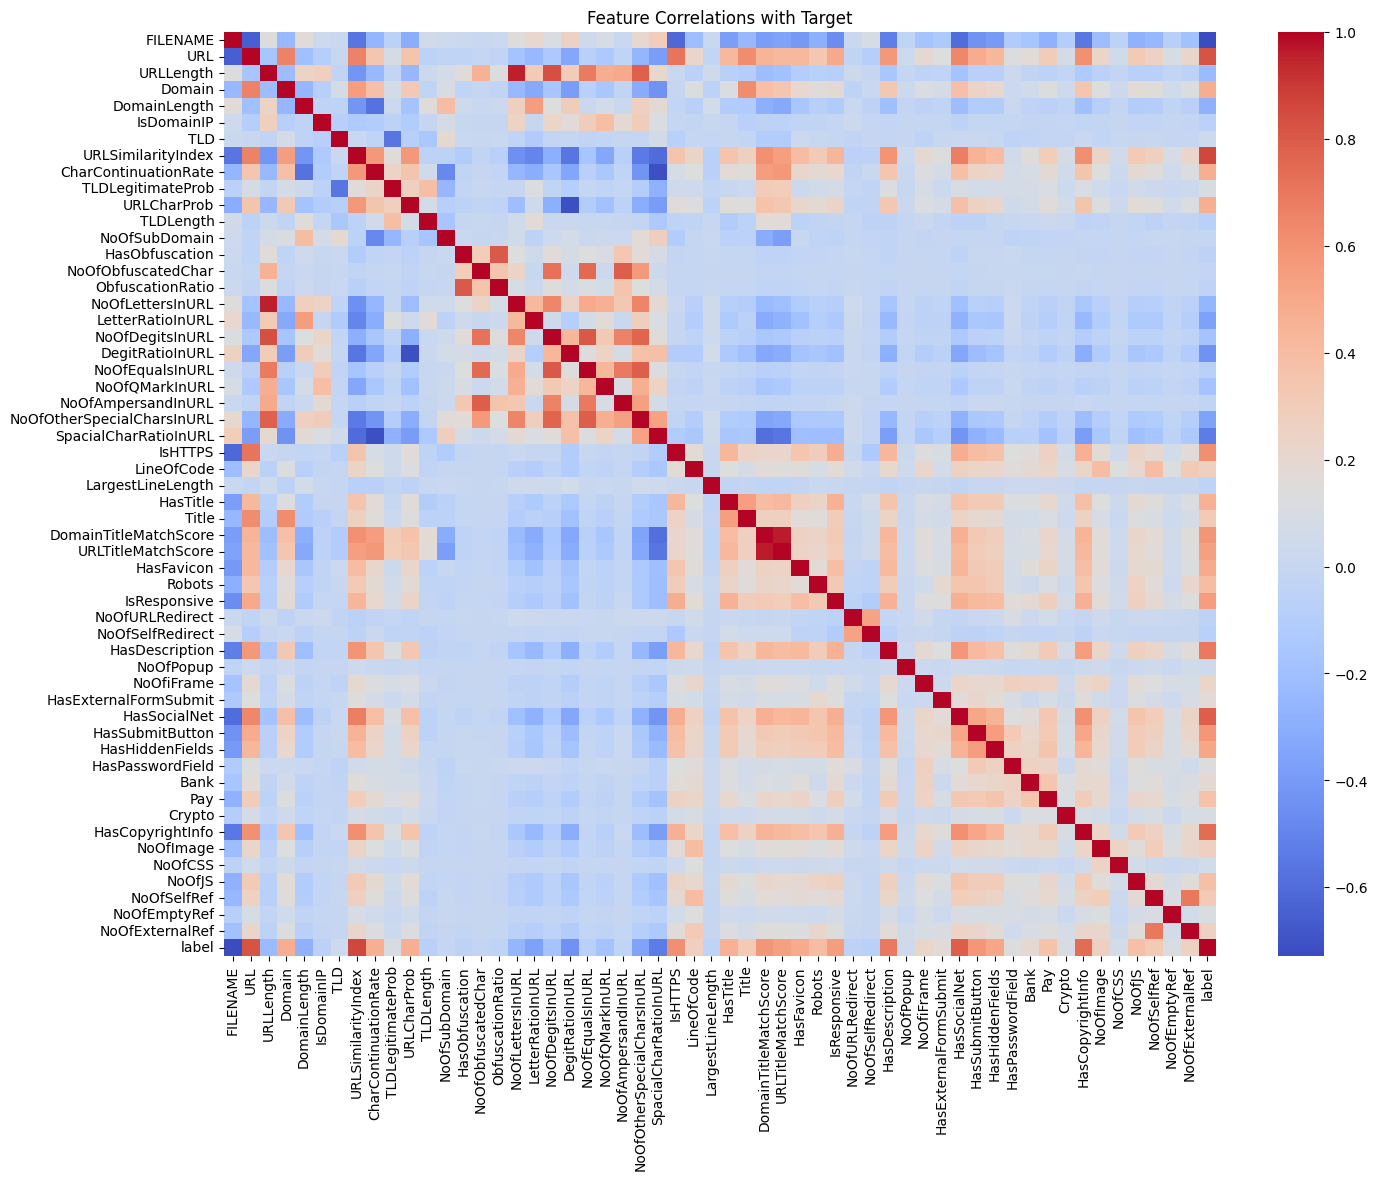

In [12]:
corr_matrix = df_Importance.corr()
plt.figure(figsize=(16,12))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlations with Target")
plt.show()

In [13]:
# to_drop = ['FILENAME', 'URL', 'Domain', 'Title', ]

# # Drop unnecessary columns
# df_cleaned = df.drop(columns=to_drop, axis=1)
# print(f"New shape: {df_cleaned.shape}")

In [14]:
# Compute correlation matrix
corr_matrix = df.select_dtypes(include=[np.number]).corr().abs()

# Upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation > 0.9
to_drop_corr = [column for column in upper.columns if any(upper[column] > 0.9)]

# Add metadata/identifier features that are useless
to_drop_manual = ['FILENAME', 'URL', 'Domain', 'Title']

# Combine drop lists
to_drop = list(set(to_drop_corr + to_drop_manual))

print("Features to drop (highly correlated or irrelevant):")
print(to_drop)

# Optionally drop them
df_cleaned = df.drop(columns=to_drop)

Features to drop (highly correlated or irrelevant):
['Domain', 'Title', 'NoOfLettersInURL', 'URL', 'FILENAME', 'URLTitleMatchScore']


In [15]:
df_cleaned.head(5)

,URLLength,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,NoOfObfuscatedChar,ObfuscationRatio,LetterRatioInURL,NoOfDegitsInURL,DegitRatioInURL,NoOfEqualsInURL,NoOfQMarkInURL,NoOfAmpersandInURL,NoOfOtherSpecialCharsInURL,SpacialCharRatioInURL,IsHTTPS,LineOfCode,LargestLineLength,HasTitle,DomainTitleMatchScore,HasFavicon,Robots,IsResponsive,NoOfURLRedirect,NoOfSelfRedirect,HasDescription,NoOfPopup,NoOfiFrame,HasExternalFormSubmit,HasSocialNet,HasSubmitButton,HasHiddenFields,HasPasswordField,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,31,24,0,com,100.0,1.000000,0.522907,0.061933,3,1,0,0,0.0,0.581,0,0.0,0,0,0,1,0.032,1,558,9381,1,0.000000,0,1,1,0,0,0,0,1,0,0,1,1,0,1,0,0,1,34,20,28,119,0,124,1
1,23,16,0,de,100.0,0.666667,0.032650,0.050207,2,1,0,0,0.0,0.391,0,0.0,0,0,0,2,0.087,1,618,9381,1,55.555556,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,50,9,8,39,0,217,1
2,29,22,0,uk,100.0,0.866667,0.028555,0.064129,2,2,0,0,0.0,0.517,0,0.0,0,0,0,2,0.069,1,467,682,1,46.666667,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,10,2,7,42,2,5,1
3,26,19,0,com,100.0,1.000000,0.522907,0.057606,3,1,0,0,0.0,0.500,0,0.0,0,0,0,1,0.038,1,6356,26824,1,0.000000,0,1,1,0,0,0,1,12,0,1,1,1,0,0,1,1,1,3,27,15,22,1,31,1
4,33,26,0,org,100.0,1.000000,0.079963,0.059441,3,1,0,0,0.0,0.606,0,0.0,0,0,0,1,0.030,1,6089,28404,1,100.000000,0,1,1,1,1,1,0,2,0,1,1,1,0,1,1,0,1,244,15,34,72,1,85,1


In [16]:
# Filtering the numerical columns
numerical_cols = df_cleaned.select_dtypes(include=['number']).columns
numerical_cols = numerical_cols.drop('label')
# No.of rows needed in the subplot and calculate the num of rows needed.
plots_per_row = 3
num_rows = (len(numerical_cols) + plots_per_row - 1) // plots_per_row

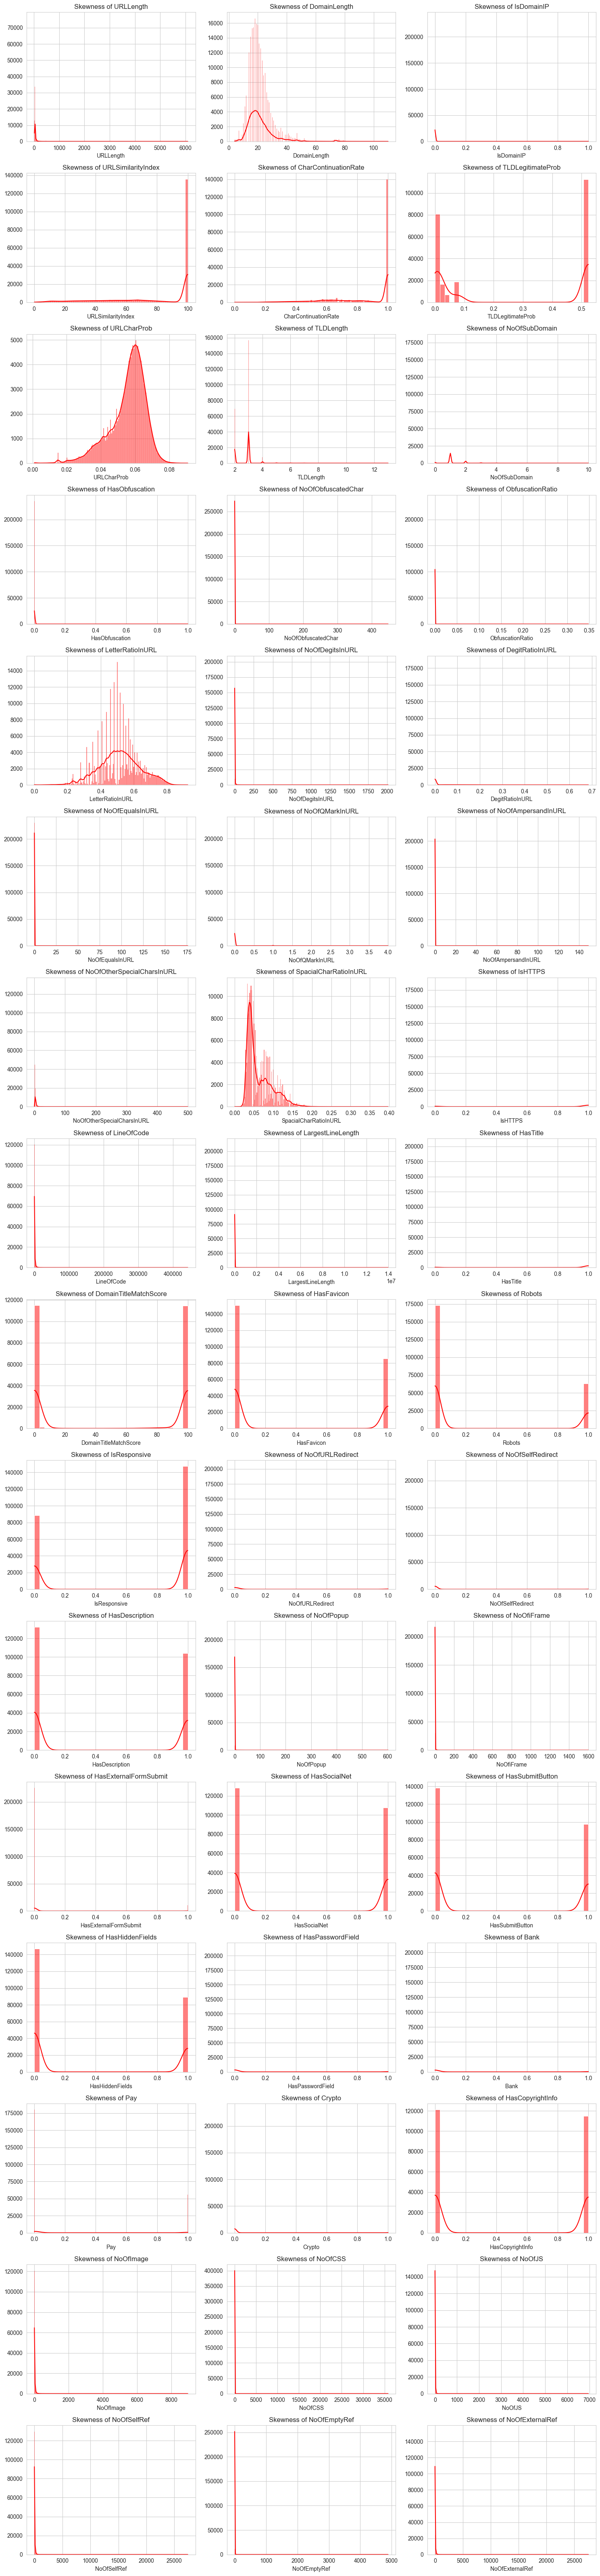

In [17]:
# skewness check
sns.set_style("whitegrid")
plt.figure(figsize=(15, num_rows * 4))
for i, col in enumerate(numerical_cols):
   
    plt.subplot(num_rows, plots_per_row, i + 1)
    sns.histplot(df_cleaned[col], kde=True, color='red')
    plt.title(f'Skewness of {col}')
    plt.ylabel('')

plt.tight_layout()
plt.show()

In [18]:
pt = PowerTransformer(method='yeo-johnson')
df_cleaned[numerical_cols] = pt.fit_transform(df_cleaned[numerical_cols])

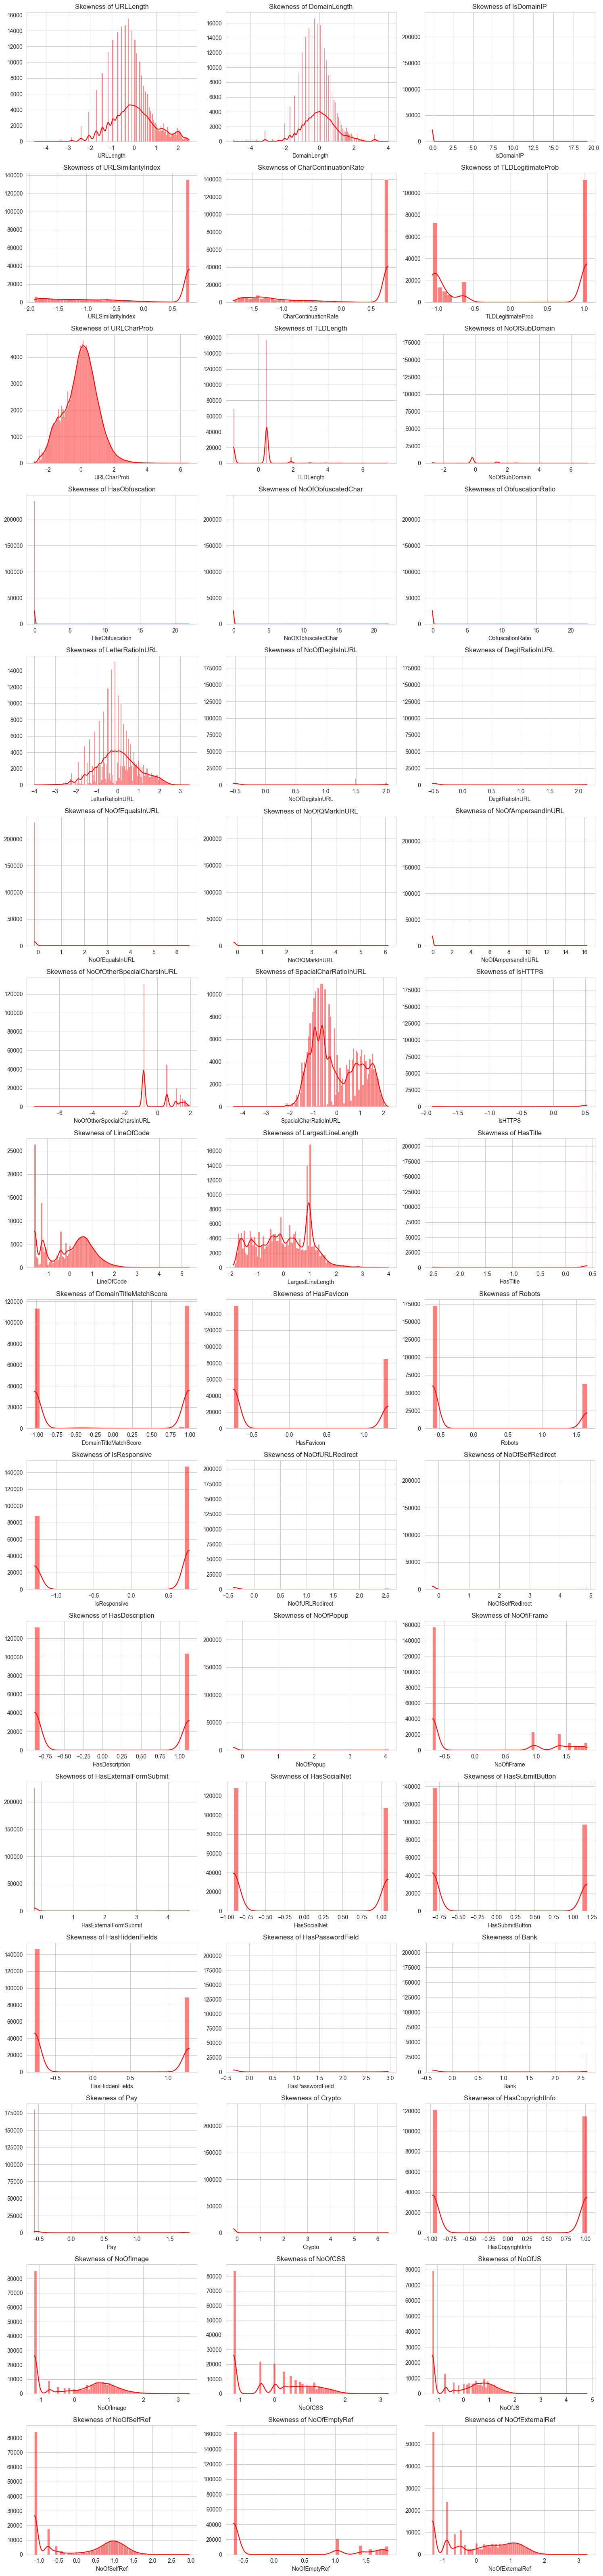

In [19]:
# skewness check
sns.set_style("whitegrid")
plt.figure(figsize=(15, num_rows * 4))
for i, col in enumerate(numerical_cols):
   
    plt.subplot(num_rows, plots_per_row, i + 1)
    sns.histplot(df_cleaned[col], kde=True, color='red')
    plt.title(f'Skewness of {col}')
    plt.ylabel('')

plt.tight_layout()
plt.show()

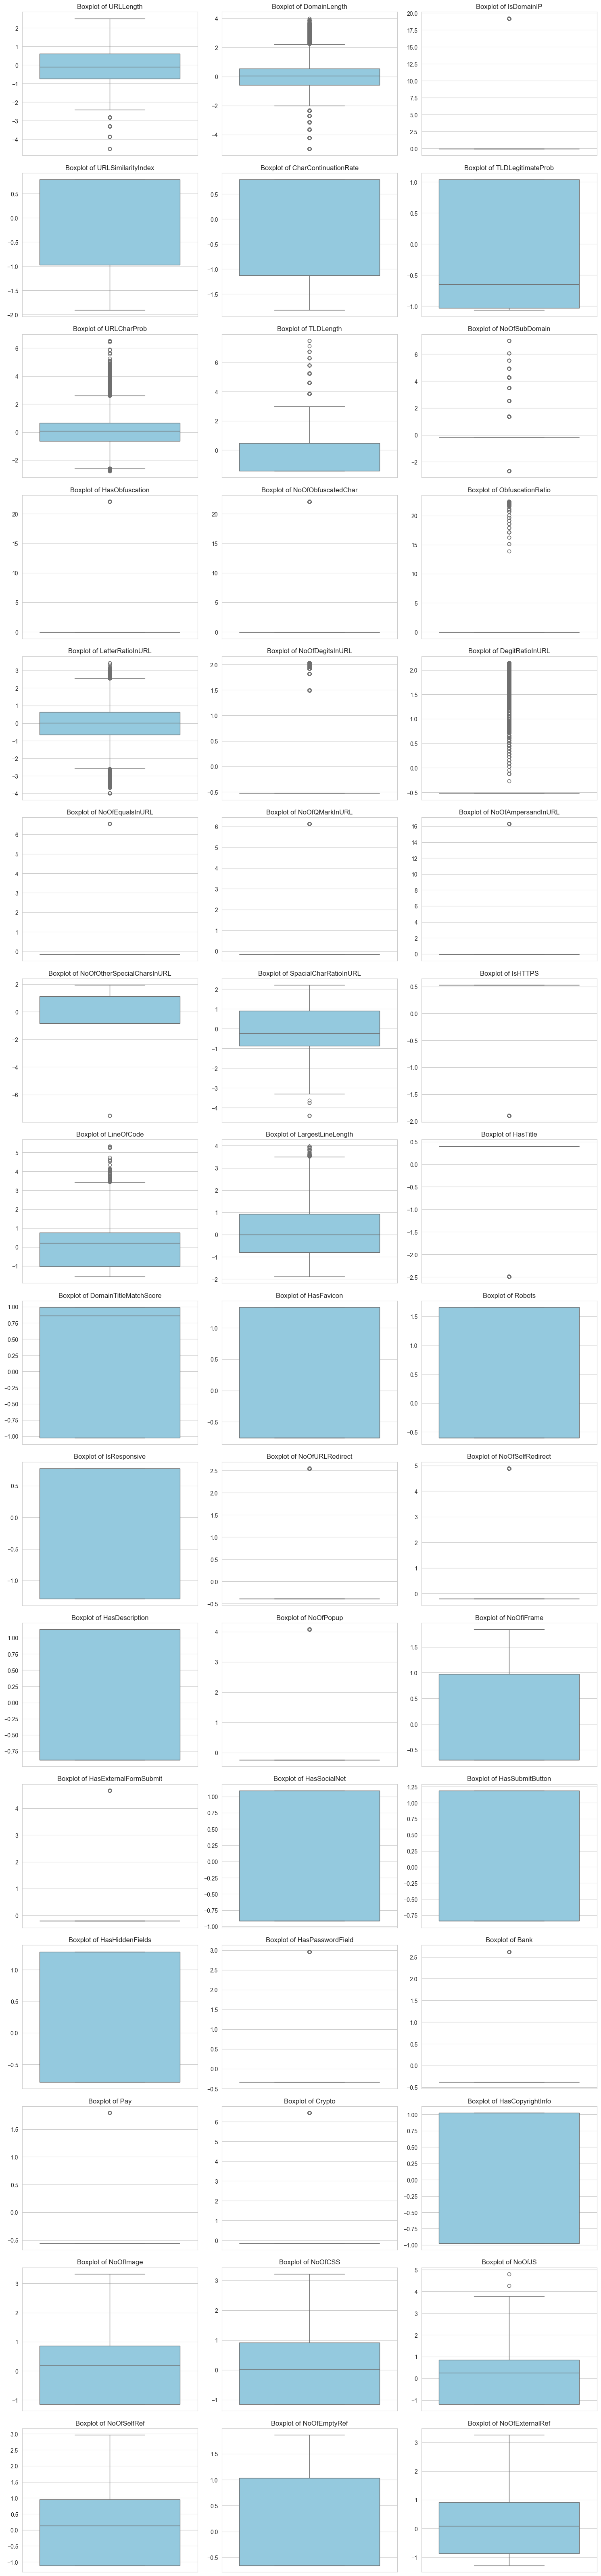

In [20]:
# Checking for outliers
plt.figure(figsize=(15, num_rows * 4))
for i, col in enumerate(numerical_cols):
 
    plt.subplot(num_rows, plots_per_row, i + 1)
    sns.boxplot(data=df_cleaned, y=col, color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.ylabel('')

plt.tight_layout()
plt.show()

In [21]:
# fixing outliers
for col in numerical_cols:
    # Calculate IQR for this column
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Clip the outliers
    df_cleaned[col] = df_cleaned[col].clip(lower=lower_bound, upper=upper_bound)

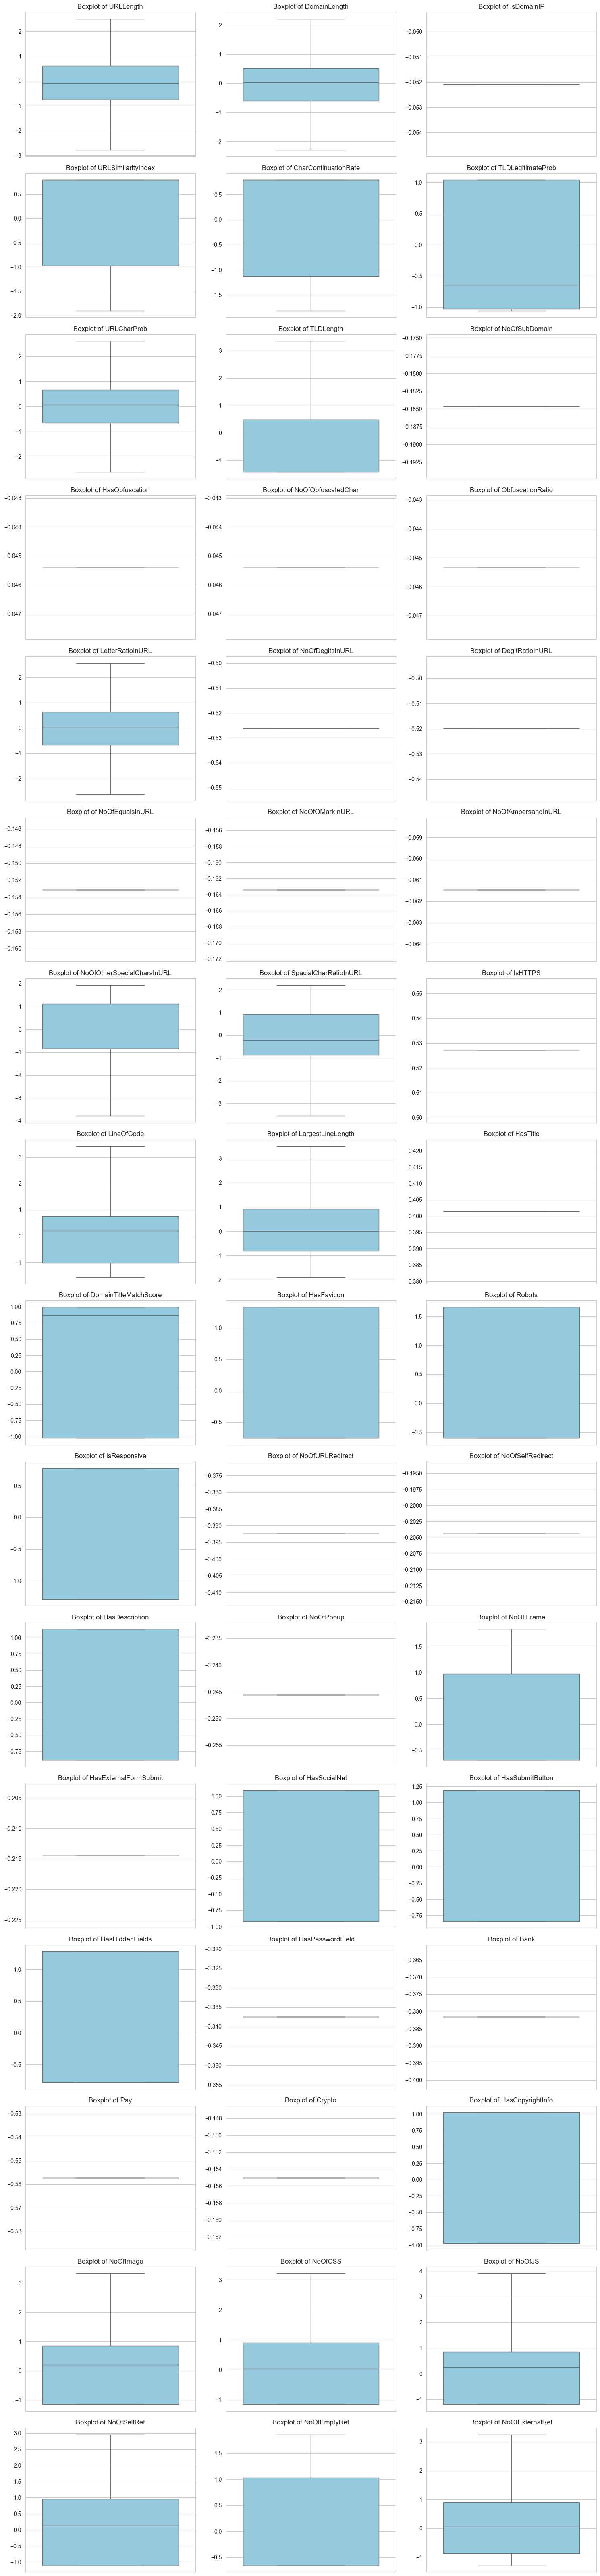

In [22]:
# visualise box plot to check outliers
plt.figure(figsize=(15, num_rows * 4))
for i, col in enumerate(numerical_cols):
 
    plt.subplot(num_rows, plots_per_row, i + 1)
    sns.boxplot(data=df_cleaned, y=col, color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.ylabel('')

plt.tight_layout()
plt.show()

Target distribution:
 label
1    0.571895
0    0.428105
Name: proportion, dtype: float64


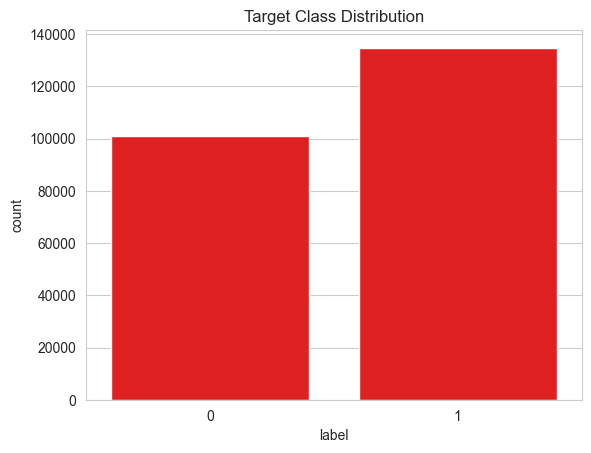

In [23]:
# Visualizing the target distribution
print("Target distribution:\n", df_cleaned['label'].value_counts(normalize=True))
sns.countplot(x='label', data=df_cleaned, color='red')
plt.title("Target Class Distribution")
plt.show()

In [24]:
# Separate features and target variable
X = df_cleaned.drop('label', axis=1)
y = df_cleaned['label']

print("Features (X) and target (y) have been separated.")

Features (X) and target (y) have been separated.


In [25]:
class_counts = y.value_counts(normalize=True)
if class_counts.min() < 0.4:
    print("Applying SMOTE for imbalance handling...")
    smote = SMOTE(random_state=42)
    X, y = smote.fit_resample(X, y)
else:
    print("No significant imbalance detected.")

No significant imbalance detected.


In [26]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

In [27]:
# Categorical features
categorical_features

Index(['TLD'], dtype='object')

In [28]:
tld_counts = X['TLD'].value_counts()
rare_tlds = tld_counts[tld_counts < 10].index

X_processed = X.copy()
X_processed['TLD'] = X['TLD'].replace(rare_tlds, 'Other')

print(f"Number of unique TLDs before grouping: {len(X['TLD'].unique())}")
print(f"Number of unique TLDs after grouping: {len(X_processed['TLD'].unique())}")

Number of unique TLDs before grouping: 695
Number of unique TLDs after grouping: 288


In [29]:
X_processed['TLD'].value_counts()

TLD
com       112554
org        18793
net         7097
app         6508
uk          6395
           ...  
health        10
ad            10
church        10
bm            10
tools         10
Name: count, Length: 288, dtype: int64

In [30]:
X_processed.head()

,URLLength,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,NoOfObfuscatedChar,ObfuscationRatio,LetterRatioInURL,NoOfDegitsInURL,DegitRatioInURL,NoOfEqualsInURL,NoOfQMarkInURL,NoOfAmpersandInURL,NoOfOtherSpecialCharsInURL,SpacialCharRatioInURL,IsHTTPS,LineOfCode,LargestLineLength,HasTitle,DomainTitleMatchScore,HasFavicon,Robots,IsResponsive,NoOfURLRedirect,NoOfSelfRedirect,HasDescription,NoOfPopup,NoOfiFrame,HasExternalFormSubmit,HasSocialNet,HasSubmitButton,HasHiddenFields,HasPasswordField,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef
0,0.352331,0.529616,-0.052087,com,0.794248,0.789796,1.040829,0.534925,0.488555,-0.184661,-0.045399,-0.045399,-0.045338,0.520269,-0.526277,-0.519905,-0.153109,-0.163374,-0.061449,-0.850082,-1.262143,0.527021,0.329081,0.989317,0.401358,-1.023962,-0.752879,1.658846,0.775402,-0.39241,-0.204408,-0.886735,-0.245572,0.975266,-0.214502,-0.916605,1.188994,1.283321,-0.337508,-0.381566,-0.55734,-0.155042,1.02681,0.937367,1.433659,1.261733,1.076476,-0.655642,1.260049
1,-0.744200,-0.596269,-0.052087,de,0.794248,-1.171998,-0.884576,-0.695753,-1.424981,-0.184661,-0.045399,-0.045399,-0.045338,-1.014028,-0.526277,-0.519905,-0.153109,-0.163374,-0.061449,0.572374,1.007003,0.527021,0.379209,0.989317,0.401358,0.727695,1.328234,1.658846,-1.289654,-0.39241,-0.204408,-0.886735,-0.245572,-0.695927,-0.214502,1.090983,1.188994,-0.779228,-0.337508,-0.381566,-0.55734,-0.155042,1.02681,1.129997,0.981989,0.433149,0.623508,-0.655642,1.501923
2,0.143939,0.295298,-0.052087,uk,0.794248,-0.276393,-0.906115,0.822005,-1.424981,-0.184661,-0.045399,-0.045399,-0.045338,-0.002396,-0.526277,-0.519905,-0.153109,-0.163374,-0.061449,0.572374,0.517965,0.527021,0.243178,-0.215763,0.401358,0.650447,-0.752879,1.658846,0.775402,-0.39241,-0.204408,1.127733,-0.245572,-0.695927,-0.214502,-0.916605,1.188994,1.283321,-0.337508,-0.381566,-0.55734,-0.155042,1.02681,0.312950,0.029136,0.348268,0.654154,1.428383,-0.239354
3,-0.240342,-0.108570,-0.052087,com,0.794248,0.789796,1.040829,0.025424,0.488555,-0.184661,-0.045399,-0.045399,-0.045338,-0.140248,-0.526277,-0.519905,-0.153109,-0.163374,-0.061449,-0.850082,-0.874904,0.527021,1.709149,1.451724,0.401358,-1.023962,-0.752879,1.658846,0.775402,-0.39241,-0.204408,-0.886735,-0.245572,1.791599,-0.214502,1.090983,1.188994,1.283321,-0.337508,-0.381566,-0.55734,-0.155042,1.02681,-0.274964,1.586092,0.843894,0.385039,1.031769,0.626305
4,0.531353,0.741605,-0.052087,org,0.794248,0.789796,-0.644476,0.232860,0.488555,-0.184661,-0.045399,-0.045399,-0.045338,0.725994,-0.526277,-0.519905,-0.153109,-0.163374,-0.061449,-0.850082,-1.402278,0.527021,1.681127,1.476583,0.401358,0.991728,-0.752879,1.658846,0.775402,-0.39241,-0.204408,1.127733,-0.245572,1.378822,-0.214502,1.090983,1.188994,1.283321,-0.337508,-0.381566,-0.55734,-0.155042,1.02681,1.881438,1.278399,1.392455,0.874846,1.031769,1.092064


In [31]:
# Performing one hot encoding
X_encoded = pd.get_dummies(X_processed, columns=['TLD'], drop_first=True)

print("\nCategorical features have been grouped and one-hot encoded.")
print(f"Shape of X after encoding: {X_encoded.shape}")


Categorical features have been grouped and one-hot encoded.
Shape of X after encoding: (235795, 335)


In [32]:
# Split into train/test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (188636, 335)
Testing set shape: (47159, 335)


In [33]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(f"Training set size: {X_train_scaled.shape[0]}, Test set size: {X_test_scaled.shape[0]}")

Training set size: 188636, Test set size: 47159


------------------------------------------------------------------------------------------------------------------------------------------------

Data is now preprocessed and ready for model training.

-------------------------------------------------------------------------------------------------------------------------------------------------


Model Building and Evaluation

In [34]:
# Model building
results = {}

def build_model(model, model_name, x_train, y_train, x_test, y_test):
    print("model_name : ",model_name,'model')
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print(model)
    print("---------------------------------------------------------------")
    results[model_name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Classification_Report": classification_report(y_test, y_pred),
        "Confusion_Matrix": confusion_matrix(y_test, y_pred)
    }
 


In [35]:
# Logistic Regression model
lr_model = LogisticRegression()
build_model(lr_model,"Logistic Regression", X_train_scaled, y_train, X_test_scaled, y_test)

model_name :  Logistic Regression model
LogisticRegression()
---------------------------------------------------------------


In [36]:
# Decision Tree Classifier model
dt_model = DecisionTreeClassifier()
build_model(dt_model,"Decision Tree Classifier",X_train_scaled,y_train,X_test_scaled,y_test)

model_name :  Decision Tree Classifier model
DecisionTreeClassifier()
---------------------------------------------------------------


In [37]:
# Random Forest Classifier model
rfc = RandomForestClassifier()
build_model(rfc,"Random Forest Classifier",X_train_scaled,y_train,X_test_scaled,y_test)

model_name :  Random Forest Classifier model
RandomForestClassifier()
---------------------------------------------------------------


In [38]:
# support vector classifier model
svc_model = SVC()
build_model(svc_model,"Support Vector Machine",X_train_scaled,y_train,X_test_scaled,y_test) 

model_name :  Support Vector Machine model
SVC()
---------------------------------------------------------------


In [39]:
# K-Nearest Neighbors classifier model
knn_model = KNeighborsClassifier(n_neighbors=3)  
build_model(knn_model,"K-Nearest Neighbors",X_train_scaled,y_train,X_test_scaled,y_test)

model_name :  K-Nearest Neighbors model
KNeighborsClassifier(n_neighbors=3)
---------------------------------------------------------------


In [40]:
# Display results
print("\n📊 Model Performance Comparison:")
for model_name, metrics in results.items():
    print(f"\n--- {model_name} ---")
    for metric_name, value in metrics.items():
        # Only format numbers, not strings or arrays
        if isinstance(value, float):
            print(f"{metric_name}: {value:.6f}")
        else:
            print(f"{metric_name}:\n{value}")


📊 Model Performance Comparison:

--- Logistic Regression ---
Accuracy: 0.999852
Classification_Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20124
           1       1.00      1.00      1.00     27035

    accuracy                           1.00     47159
   macro avg       1.00      1.00      1.00     47159
weighted avg       1.00      1.00      1.00     47159

Confusion_Matrix:
[[20119     5]
 [    2 27033]]

--- Decision Tree Classifier ---
Accuracy: 0.999809
Classification_Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20124
           1       1.00      1.00      1.00     27035

    accuracy                           1.00     47159
   macro avg       1.00      1.00      1.00     47159
weighted avg       1.00      1.00      1.00     47159

Confusion_Matrix:
[[20122     2]
 [    7 27028]]

--- Random Forest Classifier ---
Accuracy: 0.999915
Classification_

In [41]:
results_df = pd.DataFrame.from_dict(results, orient='index')
# Sort it by the 'Accuracy' column
results_df = results_df.sort_values(by="Accuracy", ascending=False)
# Summary of model performance
print("\nModel Performance Summary:")
print(results_df)


Model Performance Summary:
                          Accuracy  \
Random Forest Classifier  0.999915   
Logistic Regression       0.999852   
Decision Tree Classifier  0.999809   
Support Vector Machine    0.998176   
K-Nearest Neighbors       0.998092   

                                                      Classification_Report  \
Random Forest Classifier                precision    recall  f1-score   ...   
Logistic Regression                     precision    recall  f1-score   ...   
Decision Tree Classifier                precision    recall  f1-score   ...   
Support Vector Machine                  precision    recall  f1-score   ...   
K-Nearest Neighbors                     precision    recall  f1-score   ...   

                                    Confusion_Matrix  
Random Forest Classifier    [[20120, 4], [0, 27035]]  
Logistic Regression         [[20119, 5], [2, 27033]]  
Decision Tree Classifier    [[20122, 2], [7, 27028]]  
Support Vector Machine    [[20067, 57], [29, 270

In [42]:
best_model_name = max(results, key=lambda k: results[k]['Accuracy'])
worst_model_name = min(results, key=lambda k: results[k]['Accuracy'])
print("Best model:", best_model_name, results[best_model_name])
print("Worst model:", worst_model_name, results[worst_model_name])

Best model: Random Forest Classifier {'Accuracy': 0.9999151805593842, 'Classification_Report': '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00     20124\n           1       1.00      1.00      1.00     27035\n\n    accuracy                           1.00     47159\n   macro avg       1.00      1.00      1.00     47159\nweighted avg       1.00      1.00      1.00     47159\n', 'Confusion_Matrix': array([[20120,     4],
       [    0, 27035]])}
Worst model: K-Nearest Neighbors {'Accuracy': 0.9980915625861447, 'Classification_Report': '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00     20124\n           1       1.00      1.00      1.00     27035\n\n    accuracy                           1.00     47159\n   macro avg       1.00      1.00      1.00     47159\nweighted avg       1.00      1.00      1.00     47159\n', 'Confusion_Matrix': array([[20065,    59],
       [   31, 27004]])}


### Analysing the models for over fitting

In [43]:
# Overfitting Random forest Regression 
lr=LogisticRegression()
lr.fit(X_train_scaled, y_train)
y_train_pred = lr.predict(X_train_scaled)
y_test_pred = lr.predict(X_test_scaled)

acc_train = accuracy_score(y_train, y_train_pred)
acc_test = accuracy_score(y_test, y_test_pred)

print("Logistic Regression - Train Accuracy score:", acc_train)
print("Logistic Regression - Test Accuracy score:", acc_test)
print("Overfitting Gap:", acc_train - acc_test)

Logistic Regression - Train Accuracy score: 0.9998462647638838
Logistic Regression - Test Accuracy score: 0.9998515659789223
Overfitting Gap: -5.301215038500118e-06


In [44]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc

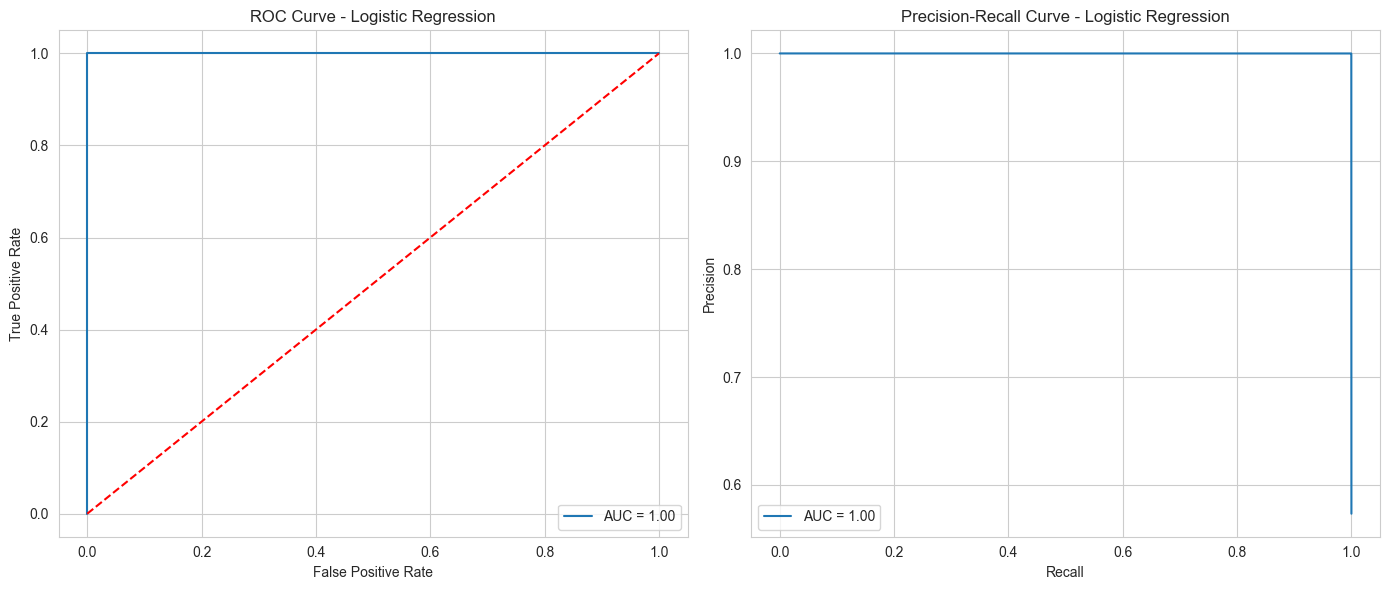

In [45]:
y_proba = lr_model.predict_proba(X_test_scaled)[:, 1]  # probability for positive class

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# --- Plot 1: ROC Curve ---
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

ax[0].plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
ax[0].plot([0, 1], [0, 1], linestyle='--', color='red')
ax[0].set_xlabel("False Positive Rate")
ax[0].set_ylabel("True Positive Rate")
ax[0].set_title("ROC Curve - Logistic Regression")
ax[0].legend()

# --- Plot 2: Precision-Recall Curve ---
precision, recall, _ = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall, precision)

ax[1].plot(recall, precision, label=f"AUC = {pr_auc:.2f}")
ax[1].set_xlabel("Recall")
ax[1].set_ylabel("Precision")
ax[1].set_title("Precision-Recall Curve - Logistic Regression")
ax[1].legend()

plt.tight_layout()
plt.savefig("logistic_regression_curves.png")
plt.show()

In [46]:
# Overfitting Random forest Regression 
rfc=RandomForestClassifier()
rfc.fit(X_train_scaled, y_train)
y_train_pred = rfc.predict(X_train_scaled)
y_test_pred = rfc.predict(X_test_scaled)

acc_train = accuracy_score(y_train, y_train_pred)
acc_test = accuracy_score(y_test, y_test_pred)

print("Random Forest Classifier - Train Accuracy score:", acc_train)
print("Random Forest Classifier - Test Accuracy score:", acc_test)
print("Overfitting Gap:", acc_train - acc_test)

Random Forest Classifier - Train Accuracy score: 1.0
Random Forest Classifier - Test Accuracy score: 0.9998939756992302
Overfitting Gap: 0.00010602430076978031


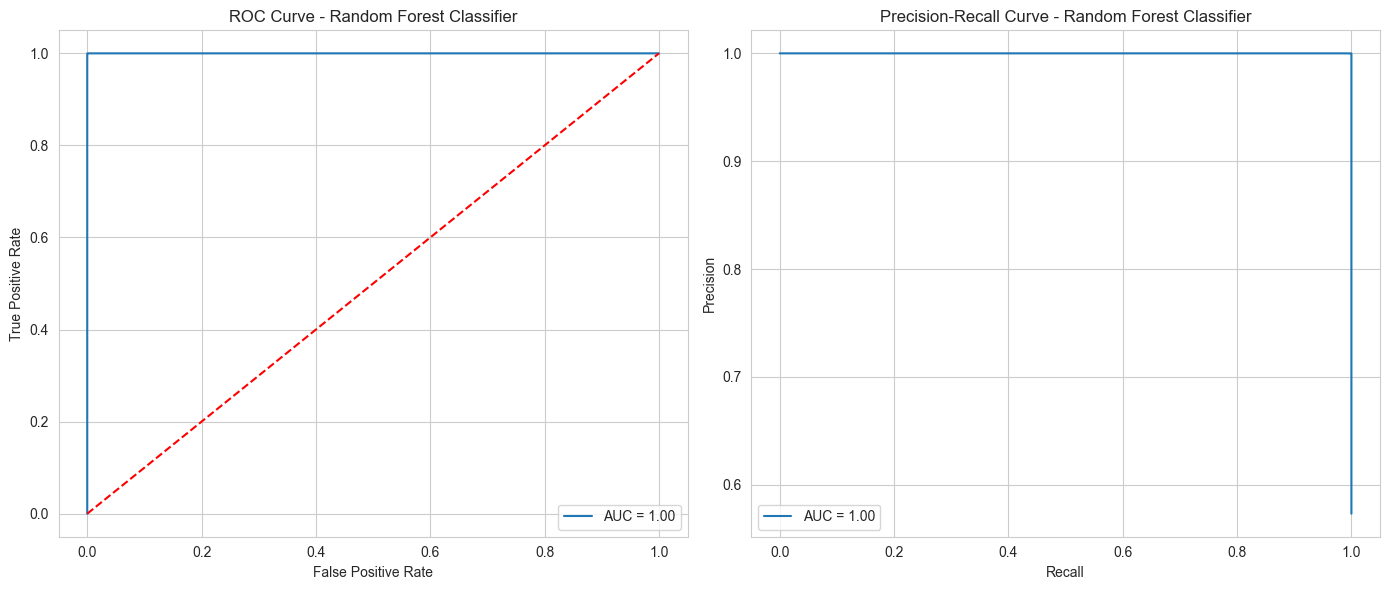

In [47]:
y_proba = rfc.predict_proba(X_test_scaled)[:, 1]  # probability of positive class

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# --- Plot 1: ROC Curve ---
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

ax[0].plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
ax[0].plot([0, 1], [0, 1], linestyle='--', color='red')
ax[0].set_xlabel("False Positive Rate")
ax[0].set_ylabel("True Positive Rate")
ax[0].set_title("ROC Curve - Random Forest Classifier")
ax[0].legend()

# --- Plot 2: Precision-Recall Curve ---
precision, recall, _ = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall, precision)

ax[1].plot(recall, precision, label=f"AUC = {pr_auc:.2f}")
ax[1].set_xlabel("Recall")
ax[1].set_ylabel("Precision")
ax[1].set_title("Precision-Recall Curve - Random Forest Classifier")
ax[1].legend()

plt.tight_layout()
plt.savefig("random_forest_curves.png")
plt.show()

In [48]:
# Overfitting Decision Tree Regression 
dt = DecisionTreeClassifier()
dt.fit(X_train_scaled, y_train)
y_train_pred = dt.predict(X_train_scaled)
y_test_pred = dt.predict(X_test_scaled)

acc_train = accuracy_score(y_train, y_train_pred)
acc_test = accuracy_score(y_test, y_test_pred)

print("Decision Tree Classifier - Train Accuracy score:", acc_train)
print("Decision Tree Classifier - Test Accuracy score:", acc_test)
print("Overfitting Gap:", acc_train - acc_test)

Decision Tree Classifier - Train Accuracy score: 1.0
Decision Tree Classifier - Test Accuracy score: 0.9997879513984606
Overfitting Gap: 0.0002120486015394496


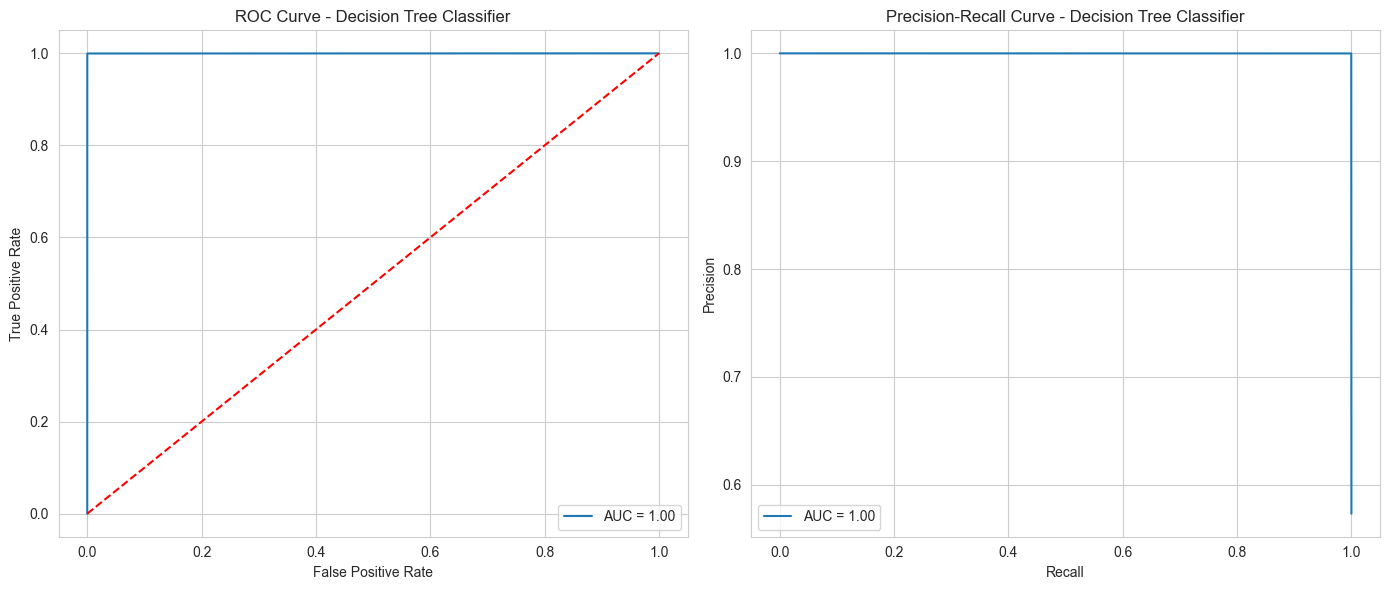

In [49]:
y_proba_dt = dt.predict_proba(X_test_scaled)[:, 1]  # probability of positive class

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# --- Plot 1: ROC Curve ---
fpr, tpr, _ = roc_curve(y_test, y_proba_dt)
roc_auc = roc_auc_score(y_test, y_proba_dt)

ax[0].plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
ax[0].plot([0, 1], [0, 1], linestyle='--', color='red')
ax[0].set_xlabel("False Positive Rate")
ax[0].set_ylabel("True Positive Rate")
ax[0].set_title("ROC Curve - Decision Tree Classifier")
ax[0].legend()

# --- Plot 2: Precision-Recall Curve ---
precision, recall, _ = precision_recall_curve(y_test, y_proba_dt)
pr_auc = auc(recall, precision)

ax[1].plot(recall, precision, label=f"AUC = {pr_auc:.2f}")
ax[1].set_xlabel("Recall")
ax[1].set_ylabel("Precision")
ax[1].set_title("Precision-Recall Curve - Decision Tree Classifier")
ax[1].legend()

plt.tight_layout()
plt.savefig("decision_tree_curves.png")
plt.show()

In [50]:
# Overfitting Support Vector Classifier
svc = SVC(probability=True, random_state=42)
svc.fit(X_train_scaled, y_train)
y_train_pred = svc.predict(X_train_scaled)
y_test_pred = svc.predict(X_test_scaled)

acc_train = accuracy_score(y_train, y_train_pred)
acc_test = accuracy_score(y_test, y_test_pred)

print("Support Vector Classifier - Train Accuracy score:", acc_train)
print("Support Vector Classifier - Test Accuracy score:", acc_test)
print("Overfitting Gap:", acc_train - acc_test)

Support Vector Classifier - Train Accuracy score: 0.9985898767997625
Support Vector Classifier - Test Accuracy score: 0.9981763820267605
Overfitting Gap: 0.00041349477300201


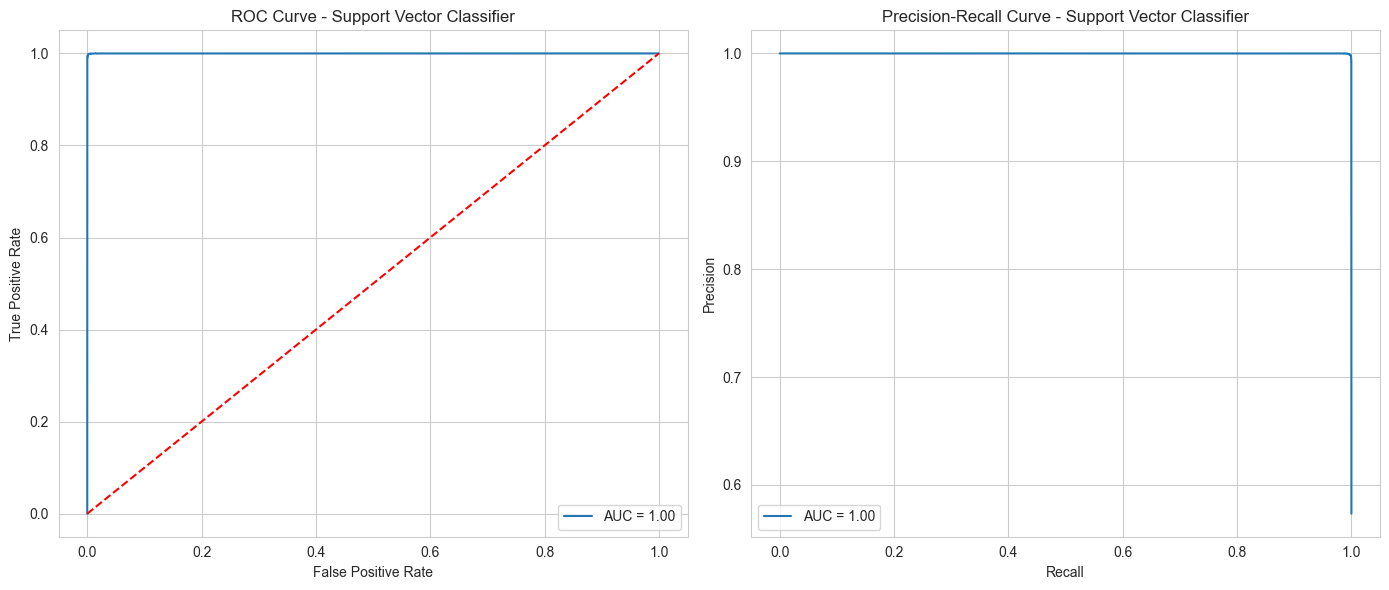

In [51]:
y_proba_svc = svc.predict_proba(X_test_scaled)[:, 1]  # probability for positive class

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# --- Plot 1: ROC Curve ---
fpr, tpr, _ = roc_curve(y_test, y_proba_svc)
roc_auc = roc_auc_score(y_test, y_proba_svc)

ax[0].plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
ax[0].plot([0, 1], [0, 1], linestyle='--', color='red')
ax[0].set_xlabel("False Positive Rate")
ax[0].set_ylabel("True Positive Rate")
ax[0].set_title("ROC Curve - Support Vector Classifier")
ax[0].legend()

# --- Plot 2: Precision-Recall Curve ---
precision, recall, _ = precision_recall_curve(y_test, y_proba_svc)
pr_auc = auc(recall, precision)

ax[1].plot(recall, precision, label=f"AUC = {pr_auc:.2f}")
ax[1].set_xlabel("Recall")
ax[1].set_ylabel("Precision")
ax[1].set_title("Precision-Recall Curve - Support Vector Classifier")
ax[1].legend()

plt.tight_layout()
plt.savefig("support_vector_curves.png")
plt.show()

In [52]:
# Overfitting K-Neighbors Classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)
y_train_pred = knn.predict(X_train_scaled)
y_test_pred = knn.predict(X_test_scaled)

acc_train = accuracy_score(y_train, y_train_pred)
acc_test = accuracy_score(y_test, y_test_pred)

print("K-Neighbors Classifier - Train Accuracy score:", acc_train)
print("K-Neighbors Classifier - Test Accuracy score:", acc_test)
print("Overfitting Gap:", acc_train - acc_test)

K-Neighbors Classifier - Train Accuracy score: 0.9987012023155707
K-Neighbors Classifier - Test Accuracy score: 0.9980915625861447
Overfitting Gap: 0.0006096397294259592


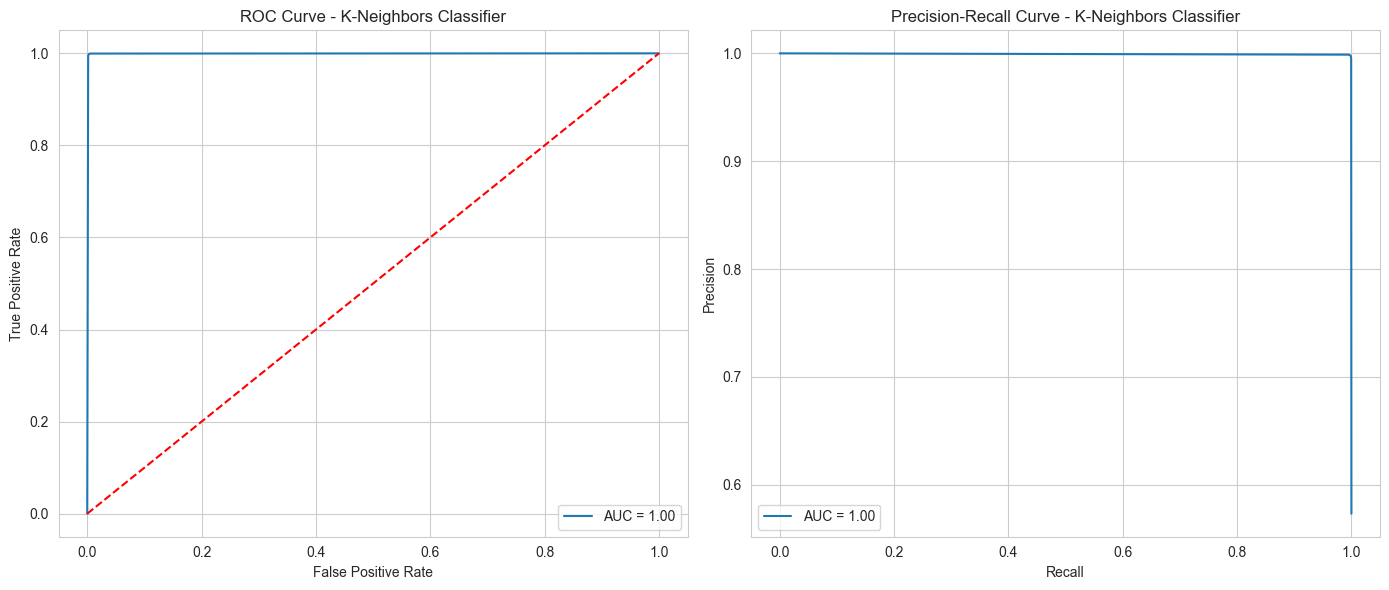

In [53]:
y_proba_knn = knn.predict_proba(X_test_scaled)[:, 1]  # probability for positive class

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# --- Plot 1: ROC Curve ---
fpr, tpr, _ = roc_curve(y_test, y_proba_knn)
roc_auc = roc_auc_score(y_test, y_proba_knn)

ax[0].plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
ax[0].plot([0, 1], [0, 1], linestyle='--', color='red')
ax[0].set_xlabel("False Positive Rate")
ax[0].set_ylabel("True Positive Rate")
ax[0].set_title("ROC Curve - K-Neighbors Classifier")
ax[0].legend()

# --- Plot 2: Precision-Recall Curve ---
precision, recall, _ = precision_recall_curve(y_test, y_proba_knn)
pr_auc = auc(recall, precision)

ax[1].plot(recall, precision, label=f"AUC = {pr_auc:.2f}")
ax[1].set_xlabel("Recall")
ax[1].set_ylabel("Precision")
ax[1].set_title("Precision-Recall Curve - K-Neighbors Classifier")
ax[1].legend()

plt.tight_layout()
plt.savefig("k_neighbors_curves.png")
plt.show()

HYPERPARAMETER TUNING

Hyperparameter tuning is the process of selecting the best set of hyperparameters to optimize a machine learning model's performance. Unlike model parameters (learned from data), hyperparameters are set manually before training.

I am selecting best-performing model for hyperparameter tuning.

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(100, 301),       # Number of trees in the forest (100 to 300 trees)
    'max_depth': randint(10, 51),            # Maximum depth of each tree (10 to 50 levels)
    'min_samples_split': randint(2, 11),     # Minimum number of samples required to split a node (2 to 10)
    'min_samples_leaf': randint(1, 11),      # Minimum number of samples required at a leaf node (1 to 10)
    'max_features': ['sqrt', 'log2', None],  # Number of features to consider when splitting: 'sqrt' = sqrt(total_features), 'log2' = log2(total_features), None = all features
    'bootstrap': [True, False],              # Whether bootstrap samples are used when building trees:  True = sample with replacement, False = use entire dataset
    'class_weight': [None, 'balanced'],      # The class weights to apply: None = no weights, 'balanced' = weights inversely proportional to class frequencies
    'criterion': ['gini', 'entropy']         # The function to measure the quality of a split: 'gini' = Gini impurity, 'entropy' = Information Gain
}

# --- Step 3: Set up and Run Randomized Search ---
# The estimator is now the classifier directly.
random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

# 4. Fit on the PREPROCESSED training data
random_search.fit(X_train_scaled, y_train)

# 5. Output the best parameters and the cross-validated score
print("\nBest Parameters found by Random Search:")
print(random_search.best_params_)
print(f"\nBest cross-validated accuracy: {random_search.best_score_:.4f}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits

Best Parameters found by Random Search:
{'bootstrap': False, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 31, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 9, 'n_estimators': 257}

Best cross-validated accuracy: 0.9999


In [55]:
best_params = random_search.best_params_
print("Best Parameters found by Random Search:")
print(best_params)
# Best model after RandomizedSearchCV
best_rf = random_search.best_estimator_
# Predictions
y_pred = best_rf.predict(X_test_scaled)

Best Parameters found by Random Search:
{'bootstrap': False, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 31, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 9, 'n_estimators': 257}


In [56]:
import joblib 

model = RandomForestClassifier()
model.fit(X_train_scaled, y_train)
predictions = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, predictions)
classification_report = classification_report(y_test, predictions)
confusion_matrix = confusion_matrix(y_test, predictions)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report)
print("Confusion Matrix:\n", confusion_matrix)

# Save the model
joblib.dump(model, 'random_forest_model.pkl')
print("Model saved as 'random_forest_model.pkl'")

Accuracy: 0.9998939756992302
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     20124
           1       1.00      1.00      1.00     27035

    accuracy                           1.00     47159
   macro avg       1.00      1.00      1.00     47159
weighted avg       1.00      1.00      1.00     47159

Confusion Matrix:
 [[20119     5]
 [    0 27035]]
Model saved as 'random_forest_model.pkl'


------------------------------------------------------------------------------------------------------------------------------------------------

Model Builing and Evalution has been completed.

-------------------------------------------------------------------------------------------------------------------------------------------------